# **Experiment**: full algorithm of concent from smudged ground truth 4.1

In [1]:
import numpy as np
import os
import logging

from projects.lifting_v2.experiments.experimentC2.E1_run import run_experiment
from projects.lifting_v2.experiments.experimentC2.E2_post_processing import post_processing

from tools.exp_tools import Exp

logger = logging.getLogger(__name__)

In [12]:
# Experiment parameters
vol_smudge = 15
img_size = 129  # was 65 before and was 129 in rotation estimation paper
mr_repeat = 1 # number of times mesh refinement
snr = 1 / 16  # [1/2, 1/4, 1/8, 1/16, 1/32, 1/64, 1/128, 1/256]
num_imgs = 8192  # 5000  # [512, 1024, 2048, 4096, 8192]
J0 = 10

max_iter = 3

# Directly start experiment
exp = Exp()

exp.begin(prefix="expC2" , postfix="SNR{}_L{}_N{}_J{}_r{}_s{}_i{}".format(int(1/snr), img_size, num_imgs, J0, mr_repeat, vol_smudge, max_iter))
exp.dbglevel(4)

2022-02-22 11:30:18,981 INFO Results folder is /Users/wdiepeveen/Documents/PhD/Projects/2 - Cryo-EM/src/src/Cryo-EM/tools/../results/expC2_22-02-22_11-30-18_SNR16_L129_N8192_J10_r1_s15_i3


In [13]:
# Set data path
data_dir = "data"
data_filename = "clean70SRibosome_vol_65p.mrc"
data_path = os.path.join("..", "..", "..", "..",data_dir, data_filename)

# Set results folder if skip_preprocessing
# results_folder = "results/expA2_21-10-10_12-30-19_L65_N512_r1_k90_lamV10_lamD-8"
# results_folder = "results/expA2_21-10-10_12-34-53_L65_N512_r2_k90_lamV10_lamD-8"
# results_folder = "results/expA2_21-10-10_13-08-24_L65_N512_r1_k90_lamV10_lamD-10"
# results_folder = "results/expA2_21-10-10_13-47-27_L65_N512_r2_k90_lamV10_lamD-10"  # "results/lifting_21-04-26_12-22-06"

In [14]:
# Experiment

logger.info("Start Experiment")
logger.info("Running Experiment for SNR = {} and {} images".format(snr, num_imgs))

run_experiment(exp=exp,
               max_iter=max_iter,
               num_imgs=num_imgs,
               snr=snr,
               img_size=img_size,
               mr_repeat=mr_repeat,
               J0=J0,
               data_path=data_path,
               vol_smudge=vol_smudge,
               )

2022-02-22 11:30:19,806 INFO Start Experiment
2022-02-22 11:30:19,808 INFO Running Experiment for SNR = 0.0625 and 8192 images
2022-02-22 11:30:19,810 INFO This experiment illustrates orientation refinement using a lifting approach
2022-02-22 11:30:19,810 INFO Initialize simulation object and CTF filters.
2022-02-22 11:30:19,814 INFO Load 3D map and downsample 3D map to desired grids of 129 x 129 x 129.
2022-02-22 11:30:20,989 INFO Use downsampled map to creat simulation object.
2022-02-22 11:30:21,058 INFO Get true rotation angles generated randomly by the simulation object.
2022-02-22 11:32:49,327 INFO Applying forward transformations in pipeline
2022-02-22 11:32:49,342 INFO All forward transformations applied
2022-02-22 11:32:49,344 INFO Loaded 8192 images
sigma = 2.943531367604371e-06
tau = 0.010386937776030088
2022-02-22 11:35:06,670 INFO Applying forward transformations in pipeline
2022-02-22 11:35:06,671 INFO All forward transformations applied
2022-02-22 11:35:06,672 INFO Loade

2022-02-22 14:05:44,389 INFO Computing means at 32%
2022-02-22 14:05:44,412 INFO Computing 100 means of 456 points in at most 20 steps...
2022-02-22 14:05:44,526 INFO Computing means at 34%
2022-02-22 14:05:44,550 INFO Computing 100 means of 440 points in at most 20 steps...
2022-02-22 14:05:44,650 INFO Computing means at 35%
2022-02-22 14:05:44,681 INFO Computing 100 means of 411 points in at most 20 steps...
2022-02-22 14:05:44,781 INFO Computing means at 36%
2022-02-22 14:05:44,821 INFO Computing 100 means of 460 points in at most 20 steps...
2022-02-22 14:05:44,927 INFO Computing means at 37%
2022-02-22 14:05:44,950 INFO Computing 100 means of 444 points in at most 20 steps...
2022-02-22 14:05:45,060 INFO Computing means at 39%
2022-02-22 14:05:45,091 INFO Computing 100 means of 424 points in at most 20 steps...
2022-02-22 14:05:45,211 INFO Computing means at 40%
2022-02-22 14:05:45,235 INFO Computing 100 means of 457 points in at most 20 steps...
2022-02-22 14:05:45,375 INFO Compu

2022-02-22 14:11:27,074 INFO Start Postprocessing
2022-02-22 14:11:27,082 INFO Postprocessing started


/Users/wdiepeveen/PycharmProjects/Cryo-EM/lib/python3.6/site-packages/scipy/spatial/transform/rotation.py:135: UserWarning: Gimbal lock detected. Setting third angle to zero since it is not possible to uniquely determine all angles.
  warnings.warn("Gimbal lock detected. Setting third angle to zero since"


integrated (averaged) density = 0.9999999999954525
integrated (averaged) density = 0.9999999999272404
integrated (averaged) density = 1.0000000000509317


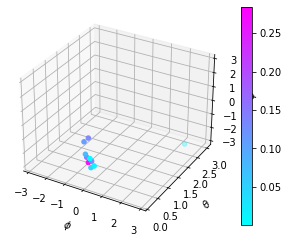

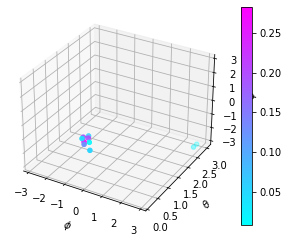

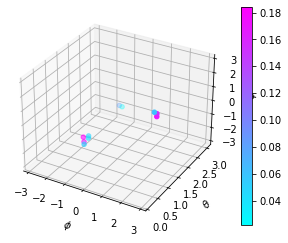

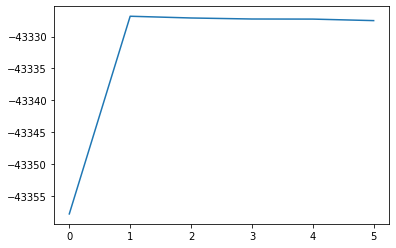

costs = [-43357.83300788349, -43326.81457992348, -43327.08690097826, -43327.24759482142, -43327.26296632854, -43327.5005810696]
2022-02-22 14:11:43,977 INFO MSE deviation of the estimated initial rotations using register_rotations : 1.8270732473575109
2022-02-22 14:11:44,153 INFO MSE deviation of the estimated GD-refined rotations using register_rotations : 1.7203217813852518


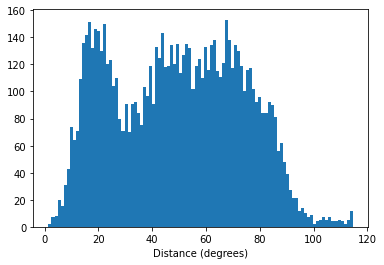

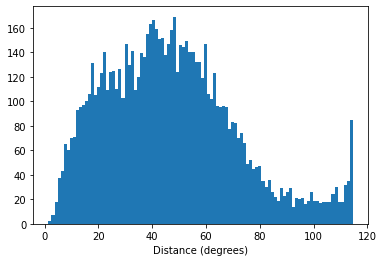

In [15]:
logger.info("Start Postprocessing")
# Postprocessing
post_processing(exp=exp,
              #  results_folder=results_folder #?
               )
